 # 4. Data Preprocessing & Feature Engineering for Machine Learning
 1. Data import.
 2. Data Cleaning and Creating Additional Features.
 3. Which Factors Influence House Prices.
 4. Advanced Exploratory Data Analysis With Seaborn.
 5. Feature Engineering.
 6. Splitting The Data Into Train And Test Set.
 7. Training the ML Model (RandomForest).
 8. Evaluating the Model on Test Set.
 9. Find Feature Importance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/content/4-housing.csv')
data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


 ### 2. Data Cleaning and Creating Additional Features.

In [4]:
df = data.copy()
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The code snippet you provided is converting the data types of specific columns in a DataFrame, and df.info() is used to display information about the DataFrame after the type conversion.

In [6]:
# Step 1: Handle Missing Values
# Fill missing values in 'total_bedrooms' with the median
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

# Step 2: Convert Numeric Columns to Integer Type (where applicable)
numeric_columns_to_int = ['total_rooms', 'total_bedrooms', 'population', 'households',
                          'median_income', 'median_house_value']
for col in numeric_columns_to_int:
    df[col] = df[col].astype(int)

# Step 3: Convert 'ocean_proximity' to a Categorical Type
df['ocean_proximity'] = df['ocean_proximity'].astype('category')

# Step 4: Check for Duplicates
# Drop duplicate rows if any exist
df.drop_duplicates(inplace=True)

# Step 5: Validate the Cleaning
print(df.info())
print(df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  int64   
 4   total_bedrooms      20640 non-null  int64   
 5   population          20640 non-null  int64   
 6   households          20640 non-null  int64   
 7   median_income       20640 non-null  int64   
 8   median_house_value  20640 non-null  int64   
 9   ocean_proximity     20640 non-null  category
dtypes: category(1), float64(3), int64(6)
memory usage: 1.4 MB
None
           longitude      latitude  housing_median_age   total_rooms  \
count   20640.000000  20640.000000        20640.000000  20640.000000   
unique           NaN           NaN                 NaN           NaN   
top    

In [7]:
# Create Rooms per Household
df['rooms_per_household'] = df['total_rooms'] / df['households']

# Create Bedrooms per Room
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

# Create Population per Household
df['population_per_household'] = df['population'] / df['households']

# Create Income Category (binning)
income_bins = [0, 2, 4, 6, 10]  # Define income ranges
income_labels = ['Low', 'Medium', 'High', 'Very High']  # Define categories
df['income_category'] = pd.cut(df['median_income'], bins=income_bins, labels=income_labels, right=False)

# Validate the new features
print(df[['rooms_per_household', 'bedrooms_per_room', 'population_per_household', 'income_category']].head())


   rooms_per_household  bedrooms_per_room  population_per_household  \
0             6.984127           0.146591                  2.555556   
1             6.238137           0.155797                  2.109842   
2             8.288136           0.129516                  2.802260   
3             5.817352           0.184458                  2.547945   
4             6.281853           0.172096                  2.181467   

  income_category  
0       Very High  
1       Very High  
2       Very High  
3            High  
4          Medium  


### 3.Which Factors Influence House Prices.

Correlation with Median House Value:
median_house_value          1.000000
median_income               0.678402
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049457
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.233303
Name: median_house_value, dtype: float64


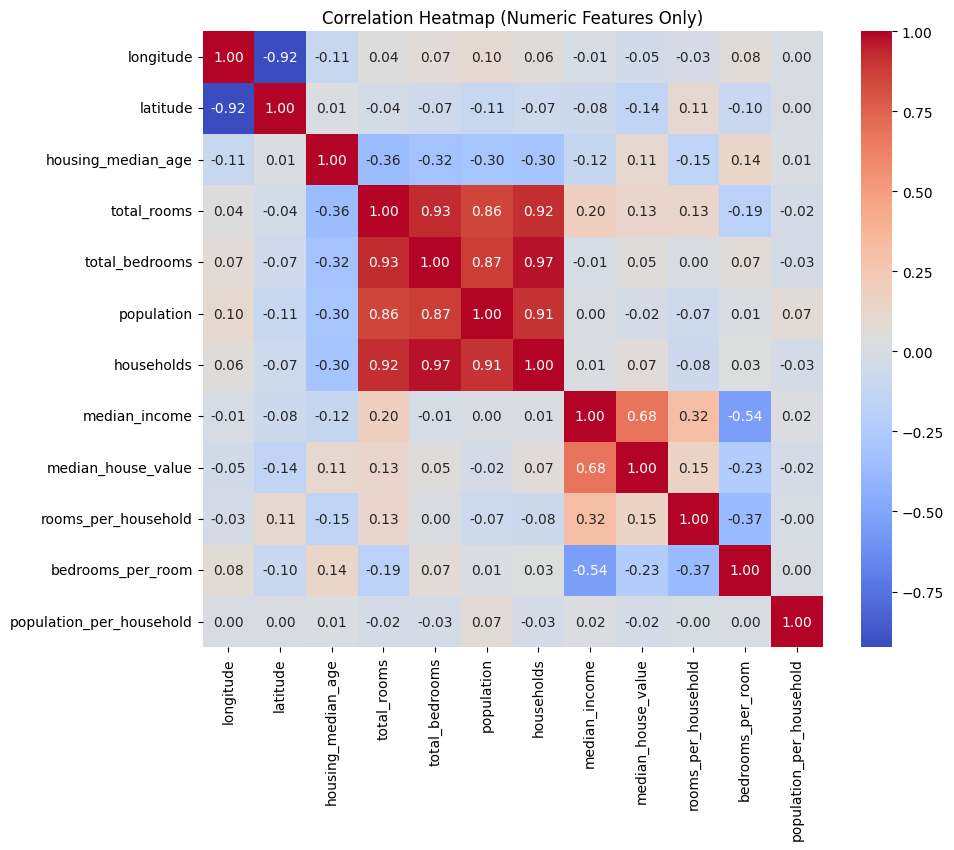

In [8]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()

print("Correlation with Median House Value:")
print(correlation_matrix['median_house_value'].sort_values(ascending=False))

# Visualize Correlation Heatmap (Numeric Columns Only)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

# Step 4: Correlation Analysis - Option 2 (Include Encoded Categorical Variable)
# Encode 'ocean_proximity'
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)



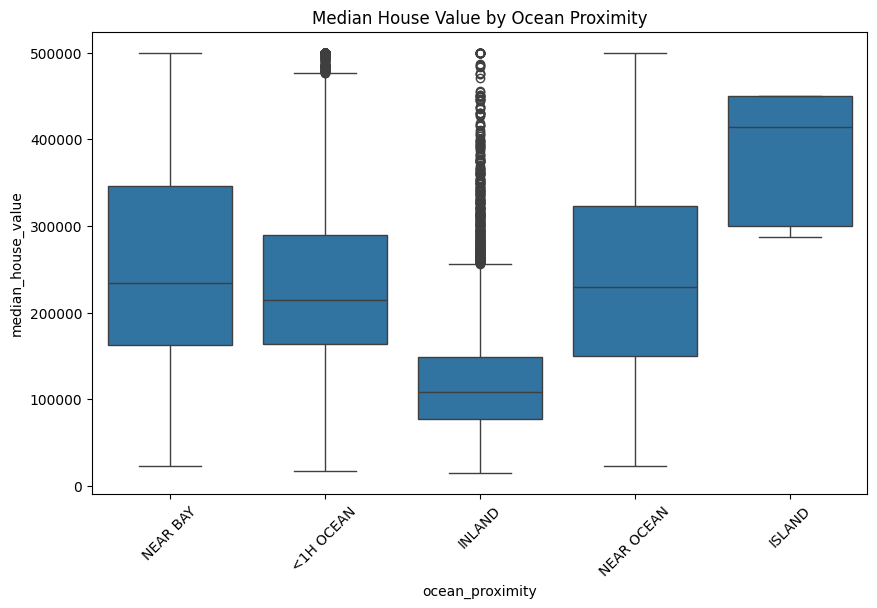

In [9]:
# Boxplot to show house value by ocean proximity
plt.figure(figsize=(10, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=data)
plt.title('Median House Value by Ocean Proximity')
plt.xticks(rotation=45)
plt.show()


### 4.Advanced Exploratory Data Analysis With Seaborn.

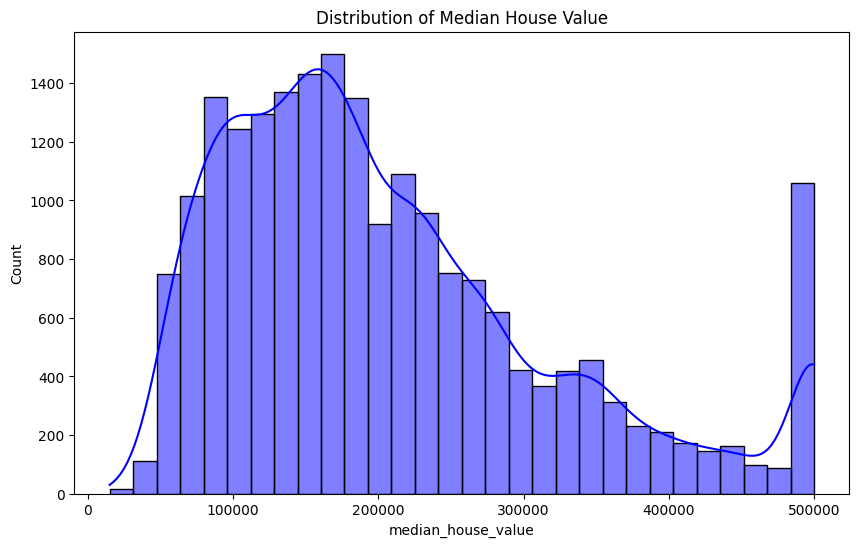

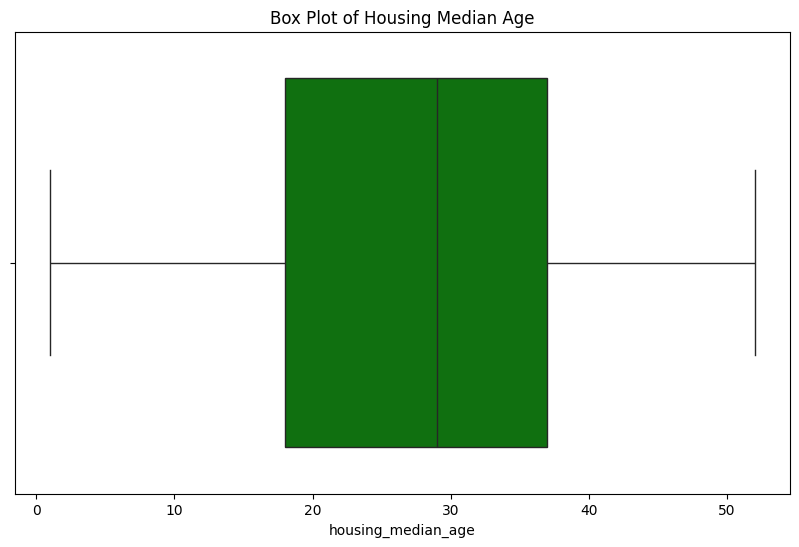

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram and KDE for a numeric feature (e.g., 'median_house_value')
plt.figure(figsize=(10, 6))
sns.histplot(df['median_house_value'], kde=True, color='blue', bins=30)
plt.title('Distribution of Median House Value')
plt.show()

# Box Plot for a numeric feature (e.g., 'housing_median_age')
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['housing_median_age'], color='green')
plt.title('Box Plot of Housing Median Age')
plt.show()


### 5.Feature Engineering.

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = '/content/4-housing.csv'
df = pd.read_csv(file_path)

# Handle Missing Values
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

# Transform Features
scaler = MinMaxScaler()
df[['median_income', 'total_rooms', 'total_bedrooms', 'population']] = scaler.fit_transform(
    df[['median_income', 'total_rooms', 'total_bedrooms', 'population']]
)
df['median_house_value_log'] = np.log1p(df['median_house_value'])

# Create New Features
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

# Encode Categorical Variables
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# Feature Selection
correlation_matrix = df.corr()
important_features = correlation_matrix['median_house_value'].sort_values(ascending=False)
print("Important Features:\n", important_features)


Important Features:
 median_house_value            1.000000
median_house_value_log        0.948631
median_income                 0.688075
ocean_proximity_NEAR BAY      0.160284
rooms_per_household           0.152202
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049457
ocean_proximity_ISLAND        0.023416
population_per_household     -0.023716
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
bedrooms_per_room            -0.232697
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64


### 6.Splitting The Data Into Train And Test Set.

Steps for Splitting the Dataset

    Import Required Libraries Use train_test_split from Scikit-Learn to split the data.

    Separate Features and Target Variable
        Features: Independent variables used to predict the target.
        Target: The dependent variable you're predicting (e.g., median_house_value).

    Split the Data Divide the dataset into training and testing subsets.

    Set a Random Seed Use a fixed random_state to ensure reproducibility.

In [13]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['median_house_value'])  # Drop the target column
y = df['median_house_value']  # Target variable

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Output the sizes of the datasets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 16512 samples
Testing set size: 4128 samples


#### Fix: Bin the Target Variable

You can create bins for the target variable (median_house_value) and use these bins for stratified splitting.

In [15]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

# Create bins for the target variable
df['price_category'] = pd.cut(
    df['median_house_value'],
    bins=[0, 100000, 200000, 300000, 400000, 500000, np.inf],
    labels=[1, 2, 3, 4, 5, 6]
)

# Check the distribution of the bins
print(df['price_category'].value_counts())

# Perform Stratified Split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['price_category']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

# Remove the temporary 'price_category' column after splitting
strat_train_set = strat_train_set.drop(columns=['price_category'])
strat_test_set = strat_test_set.drop(columns=['price_category'])

# Separate features and target
X_train = strat_train_set.drop(columns=['median_house_value'])
y_train = strat_train_set['median_house_value']
X_test = strat_test_set.drop(columns=['median_house_value'])
y_test = strat_test_set['median_house_value']

# Output sizes
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


price_category
2    8273
3    4873
1    3658
4    2092
6     965
5     779
Name: count, dtype: int64
Training set size: 16512 samples
Testing set size: 4128 samples


 ### 7. Training the ML Model (RandomForest).

##@ ** Steps to Train a Random Forest Model

  + Import Required Libraries: Use Scikit-Learn for the implementation.

  + Prepare the Data: Ensure the data is split into training (X_train, y_train) and testing sets (X_test, y_test).

  + Train the Model: Initialize and fit the RandomForestRegressor on the training data.

  + Evaluate the Model: Measure the performance using metrics like Mean Squared Error (MSE) or R² Score.

In [17]:
import numpy as np

# Check for NaN or Infinity in X_train
print("Checking for NaN values in X_train:")
print(X_train.isna().sum())

print("\nChecking for Infinity values in X_train:")
print(np.isinf(X_train).sum())

# Replace NaN and Infinity values
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.fillna(X_train.median(), inplace=True)  # Replace NaN with median

# Repeat for X_test
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.fillna(X_test.median(), inplace=True)

# Verify data cleaning
print("\nAfter cleaning:")
print("NaN values in X_train:", X_train.isna().sum().sum())
print("NaN values in X_test:", X_test.isna().sum().sum())


Checking for NaN values in X_train:
longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value_log        0
rooms_per_household           0
bedrooms_per_room             0
population_per_household      0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

Checking for Infinity values in X_train:
longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value_log        0
rooms_per_household           0
bedrooms_per_room             1
population_per_household      0
ocean_proximi

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions
y_train_pred = random_forest_model.predict(X_train)
y_test_pred = random_forest_model.predict(X_test)

# Evaluate the model
# On the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# On the testing set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print evaluation results
print(f"Training Set: MSE = {train_mse:.2f}, R² = {train_r2:.2f}")
print(f"Testing Set: MSE = {test_mse:.2f}, R² = {test_r2:.2f}")


Training Set: MSE = 1033.07, R² = 1.00
Testing Set: MSE = 7261.53, R² = 1.00


## Results

  + The training set metrics (MSE and R²) will indicate how well the model fits the training data.
  + The testing set metrics will show how well the model generalizes to unseen data.

###@ **Explanation of Parameters

  + n_estimators=100: Specifies the number of trees in the forest. Increasing this value can improve performance at the cost of computation time.

  + random_state=42: Ensures reproducibility by fixing the random seed.

  + Evaluation Metrics:
        Mean Squared Error (MSE): Measures the average squared difference between predicted and actual values. Lower is better.
        R² Score: Represents the proportion of variance explained by the model. Closer to 1 is better.

### 8. Evaluating the Model on Test Set.


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_test_pred = random_forest_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Evaluation Metrics on Test Set:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Evaluation Metrics on Test Set:
Mean Absolute Error (MAE): 20.31
Mean Squared Error (MSE): 7261.53
Root Mean Squared Error (RMSE): 85.21
R² Score: 1.00


###@ **Explanation of Metrics

  + MAE: Gives a sense of the average prediction error. Lower values are better.
  + MSE: Penalizes large errors more than MAE. Useful when large errors are particularly undesirable.
  + RMSE: Similar to MSE but easier to interpret as it is on the same scale as the target variable.
  + R² Score: Ranges from 0 to 1. Closer to 1 indicates a better fit.


### 9. Find Feature Importance.

Feature Importance:
                       Feature    Importance
8       median_house_value_log  9.999992e-01
11    population_per_household  1.148059e-07
1                     latitude  1.147876e-07
10           bedrooms_per_room  8.456081e-08
2           housing_median_age  7.684606e-08
9          rooms_per_household  7.598534e-08
7                median_income  5.551514e-08
3                  total_rooms  5.262030e-08
6                   households  5.190698e-08
0                    longitude  4.589573e-08
4               total_bedrooms  4.319510e-08
5                   population  4.174823e-08
15  ocean_proximity_NEAR OCEAN  1.025686e-08
12      ocean_proximity_INLAND  4.887171e-09
14    ocean_proximity_NEAR BAY  4.765600e-09
13      ocean_proximity_ISLAND  3.085641e-13


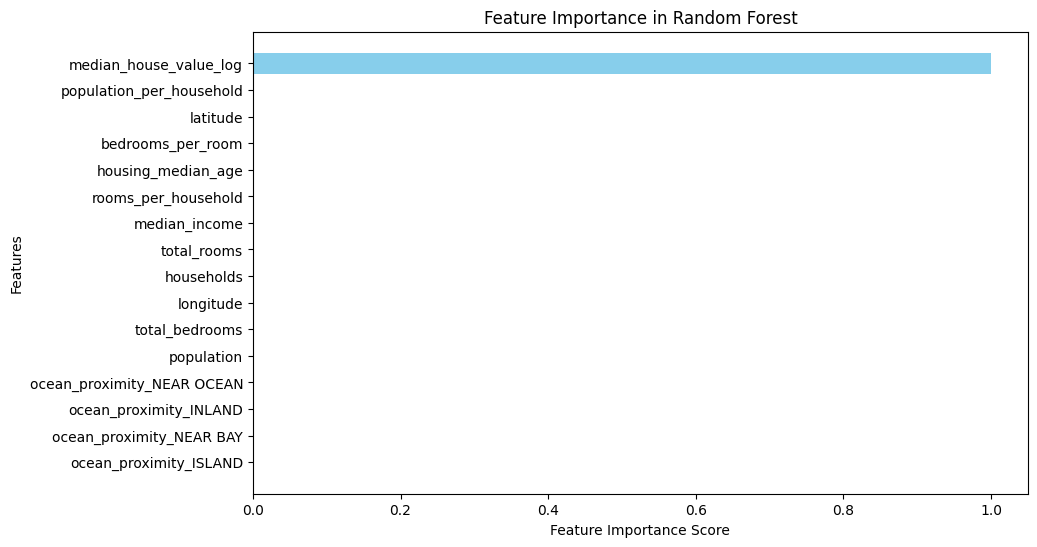

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance scores
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print the feature importance
print("Feature Importance:")
print(importance_df)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()
